## Income Data Analysis

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

**Uploading the dataset**

In [2]:
incum_df = pd.read_excel('DS1_C5_S2_Income_Data_Challenge.xlsx')

In [3]:
incum_df.head()

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K


In [4]:
incum_df.shape

(32561, 11)

In [5]:
incum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Hours_Per_Week  32561 non-null  int64 
 9   Native_Country  32561 non-null  object
 10  Income_Bracket  32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [6]:
incum_df.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

No Null Values detected

**Task 1**

In [7]:
def data_types(df):
    cat_var =[]
    con_var =[]
    
    for col in df:
        if df[col].nunique()<35:
            cat_var.append(col)
        else:
            con_var.append(col)
    return cat_var, con_var    
            

In [8]:
categorial_var, continous_var = data_types(incum_df)
print(tabulate({"cat_var":categorial_var,"con_var":continous_var},headers=["Categorial Vari","Continous Vari"]))

Categorial Vari    Continous Vari
-----------------  ----------------
WorkClass          Age
Education          Hours_Per_Week
Education_Num      Native_Country
Marital_Status
Occupation
Relationship
Gender
Income_Bracket


**Task 2**

**Performing Bi and Multi Variate Analysis on Categorial Column**

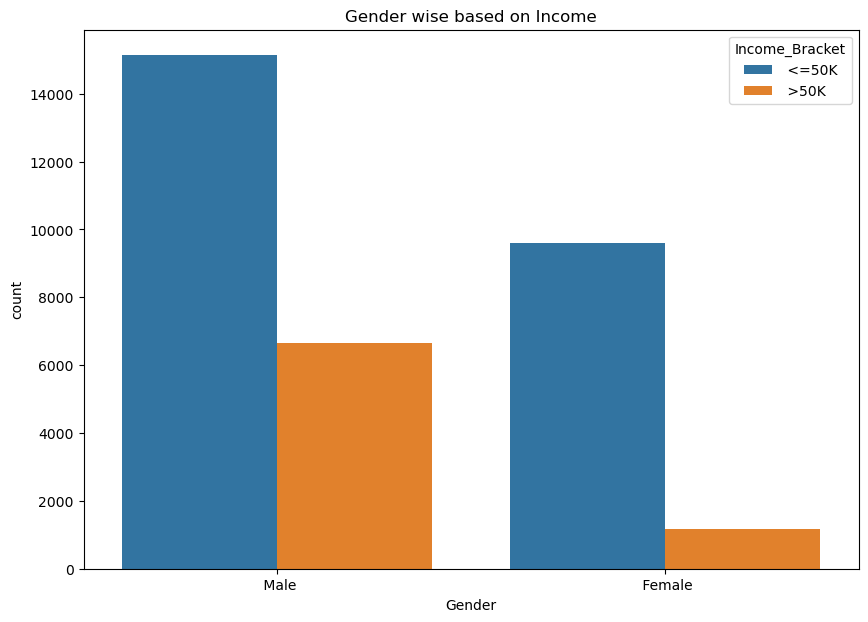

In [9]:
# Gender Vs Income
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='Gender',hue='Income_Bracket',data=incum_df)
plt.title("Gender wise based on Income")
plt.show()

From the above graph we can see that Males who earn more than 50k have high income than Females.

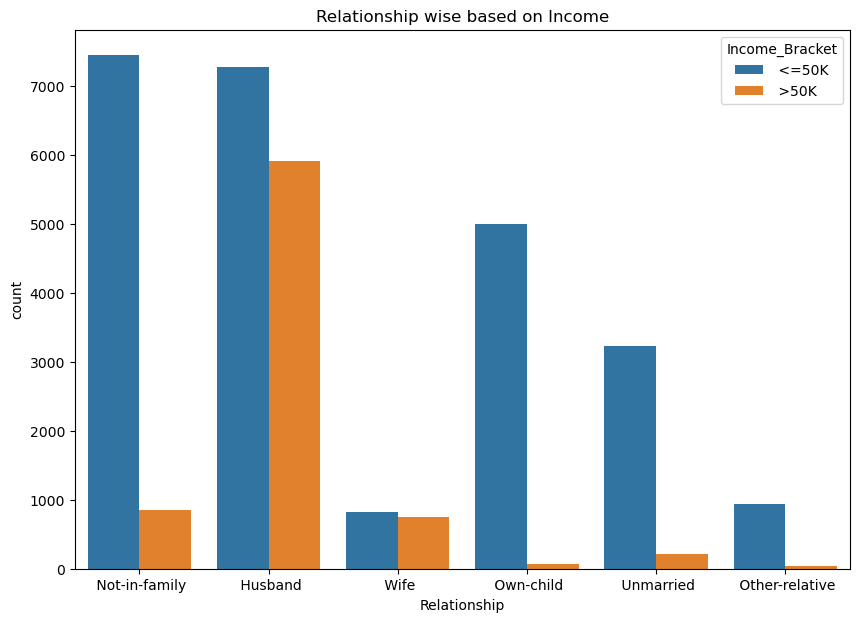

In [10]:
# Realationship VS Income
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='Relationship',hue='Income_Bracket',data=incum_df)
plt.title("Relationship wise based on Income")
plt.show()

From the above graph we can see that Husbands have high income greater than 50k but those who are not in Family or don't have any relationship have income less than or equal to 50k.

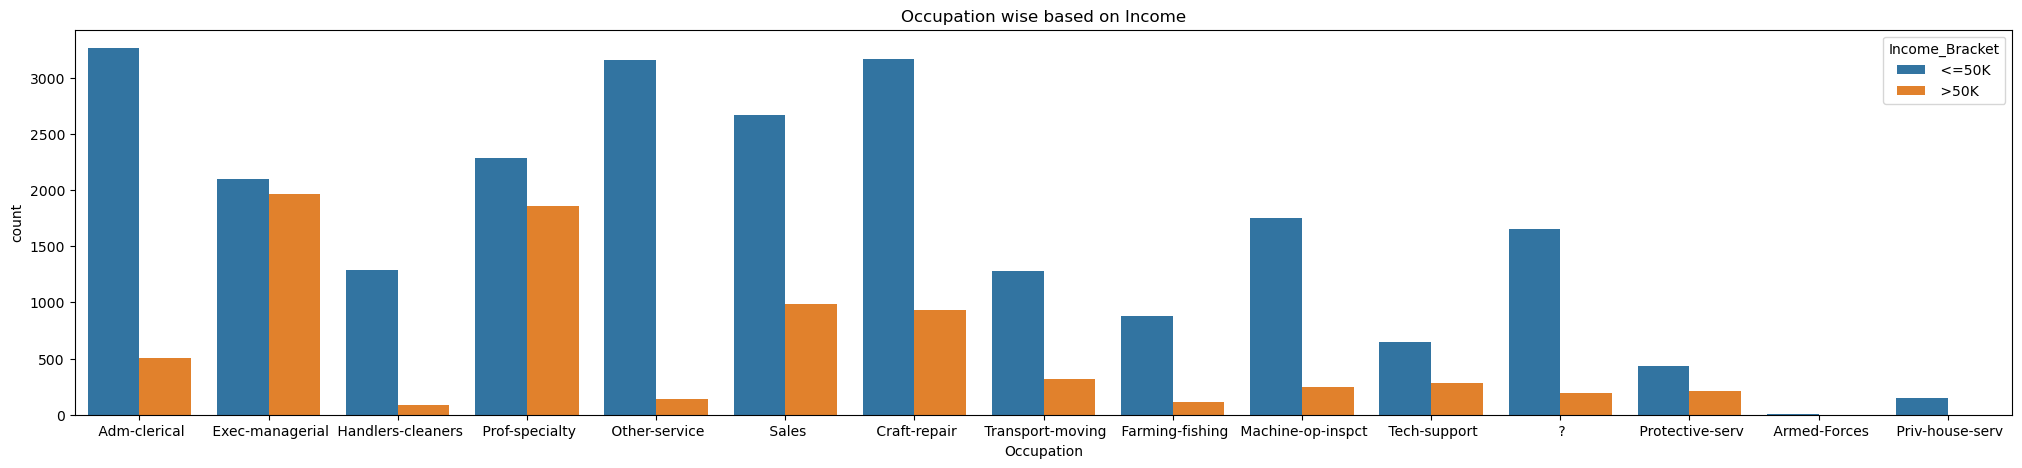

In [11]:
# Occupation VS Income
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x='Occupation',hue='Income_Bracket',data=incum_df,orient='h')
plt.title("Occupation wise based on Income")
plt.show()

From the other graph we can see that the occupations : Adm-clerical, Craft repair and other services have income less than or equal to 50k , but on the other hand occupations like Exec-managerial and Prof-speciality provide incom more than 50K

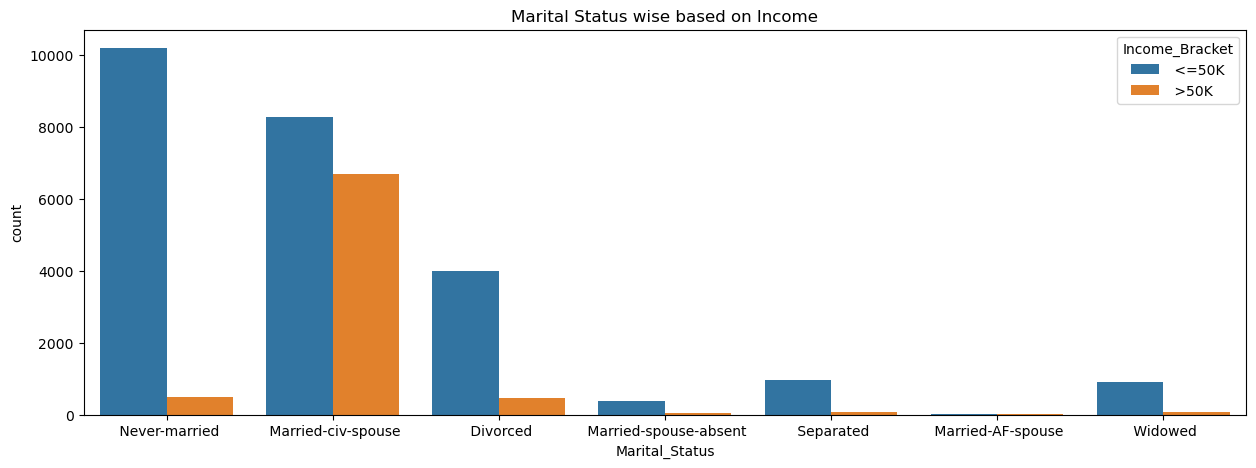

In [12]:
#Marital_Status VS Incom 

fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x='Marital_Status',hue='Income_Bracket',data=incum_df,orient='h')
plt.title("Marital Status wise based on Income")
plt.show()

From the above graph we can see that most of Singles or those who are not married have income less than equal to 50k and also most of the Married civilan have income greater than 50k. 

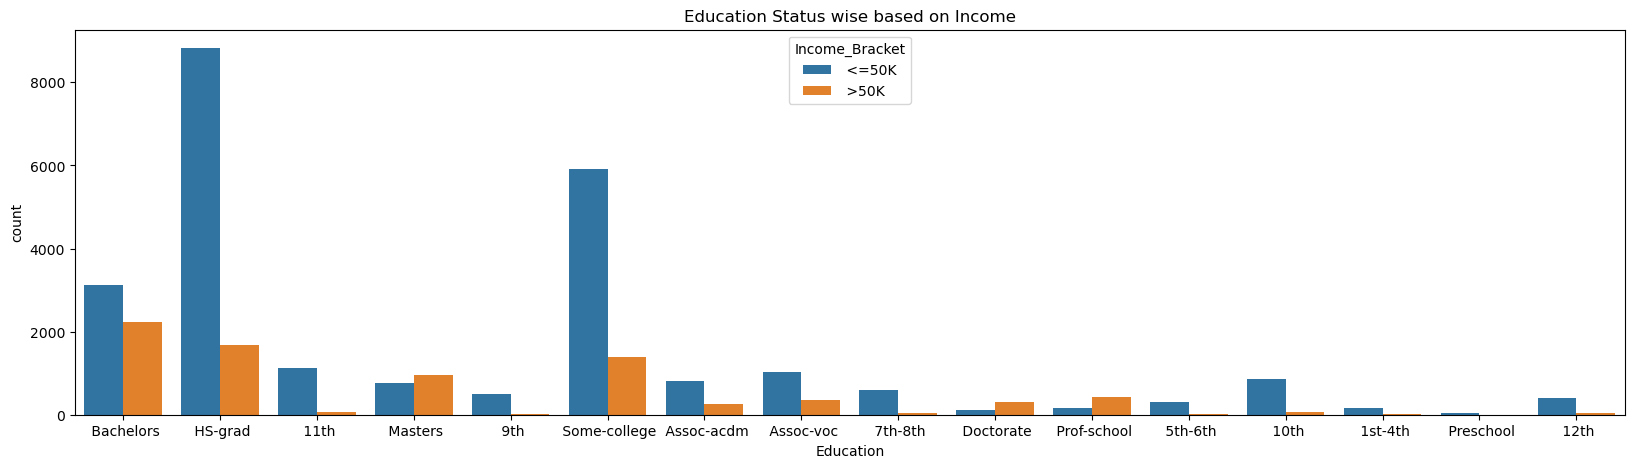

In [13]:
#Education VS Income

fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x='Education',hue='Income_Bracket',data=incum_df,orient='h')
plt.title("Education Status wise based on Income")
plt.show()

From the above graph we can see that most people who have their education from some college and Highschool graduate have income less than 50k but people who are Bachelors and HighSchool graduate also have income more than 50K. 

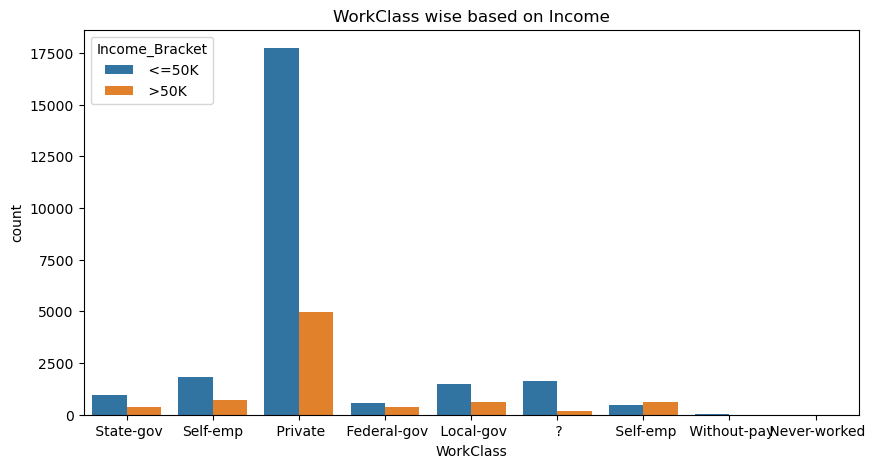

In [14]:
#WorkClass VS Income

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='WorkClass',hue='Income_Bracket',data=incum_df,orient='h')
plt.title("WorkClass wise based on Income")
plt.show()

From the above graph we can see that most people working in the Private Sector have income less than 50k and some have more than 50k.

**Task 3**

With continous Variables 'Age' on Income

<AxesSubplot:xlabel='Income_Bracket', ylabel='Age'>

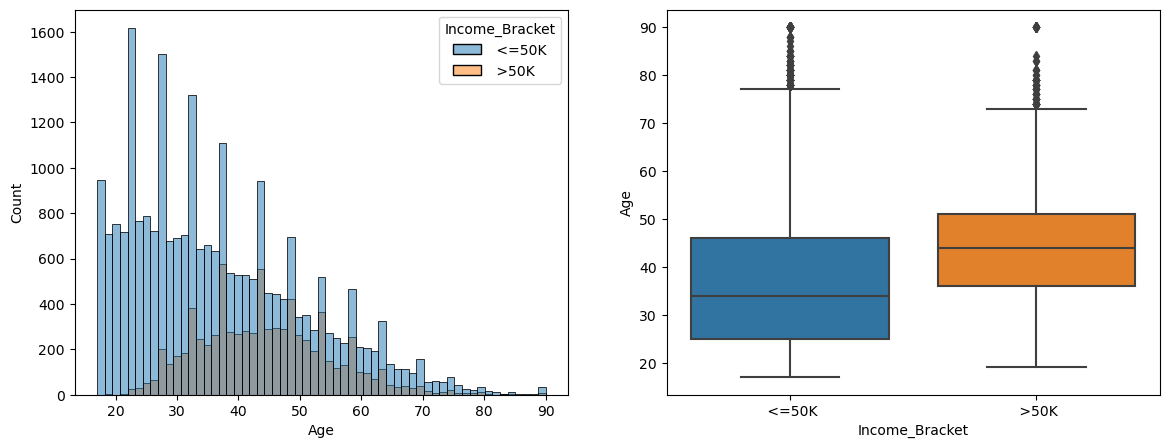

In [15]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =incum_df['Age'], hue=incum_df['Income_Bracket'],ax=ax[0])
sns.boxplot(y =incum_df['Age'], x=incum_df['Income_Bracket'],ax=ax[1])

Outliers detected 

In [16]:
incum_df.loc[incum_df['Age']>75, 'Age']=incum_df['Age'].mean()

<AxesSubplot:xlabel='Income_Bracket', ylabel='Age'>

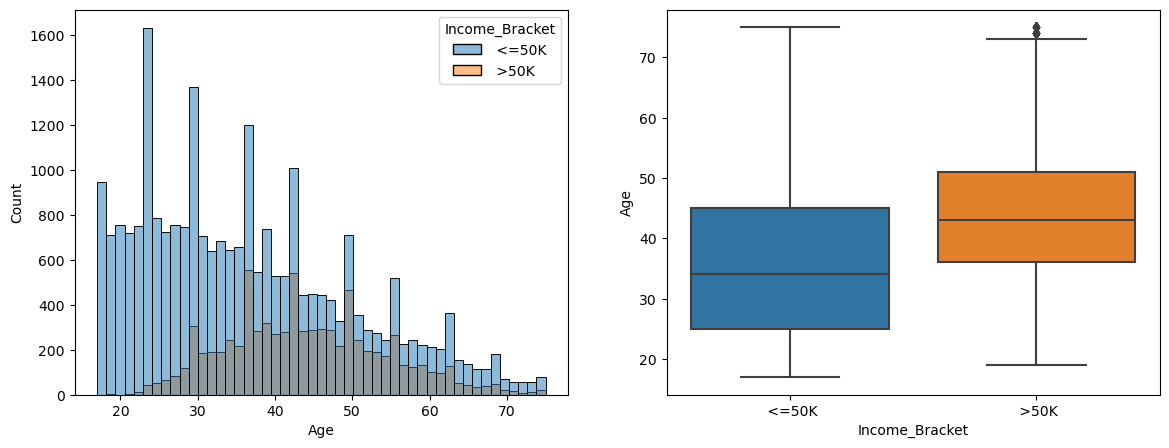

In [17]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =incum_df['Age'], hue=incum_df['Income_Bracket'],ax=ax[0])
sns.boxplot(y =incum_df['Age'], x=incum_df['Income_Bracket'],ax=ax[1])

From the graph we can see that most people between 35 to 50 Age have income greater than 50K.

Continous Variable'Hours_Per_Week' on Income Bracket

<AxesSubplot:xlabel='Income_Bracket', ylabel='Hours_Per_Week'>

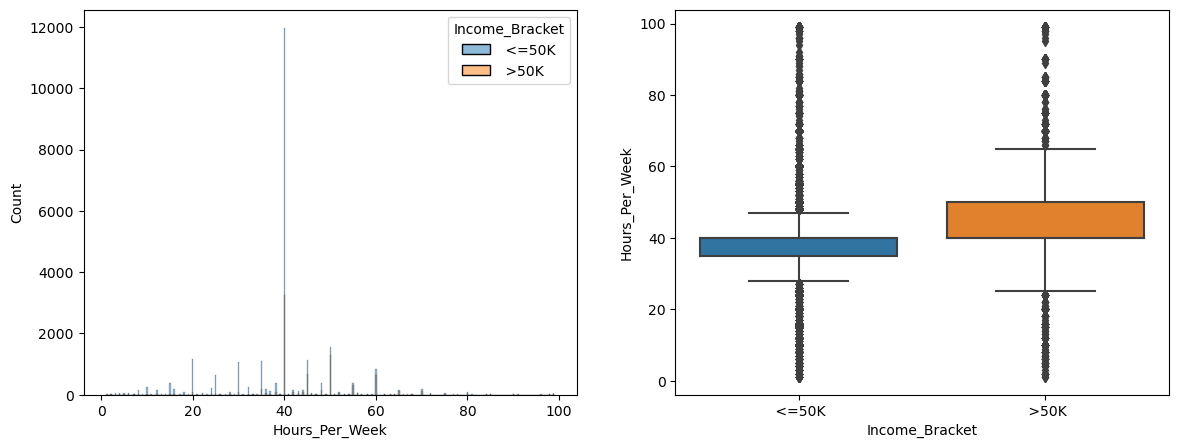

In [18]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =incum_df['Hours_Per_Week'], hue=incum_df['Income_Bracket'],ax=ax[0])
sns.boxplot(y =incum_df['Hours_Per_Week'], x=incum_df['Income_Bracket'],ax=ax[1])

Outliers Detected 

In [19]:
incum_df.loc[incum_df['Hours_Per_Week']>45, 'Hours_Per_Week']=incum_df['Hours_Per_Week'].mean()
incum_df.loc[incum_df['Hours_Per_Week']<28, 'Hours_Per_Week']=incum_df['Hours_Per_Week'].mean()

<AxesSubplot:xlabel='Income_Bracket', ylabel='Hours_Per_Week'>

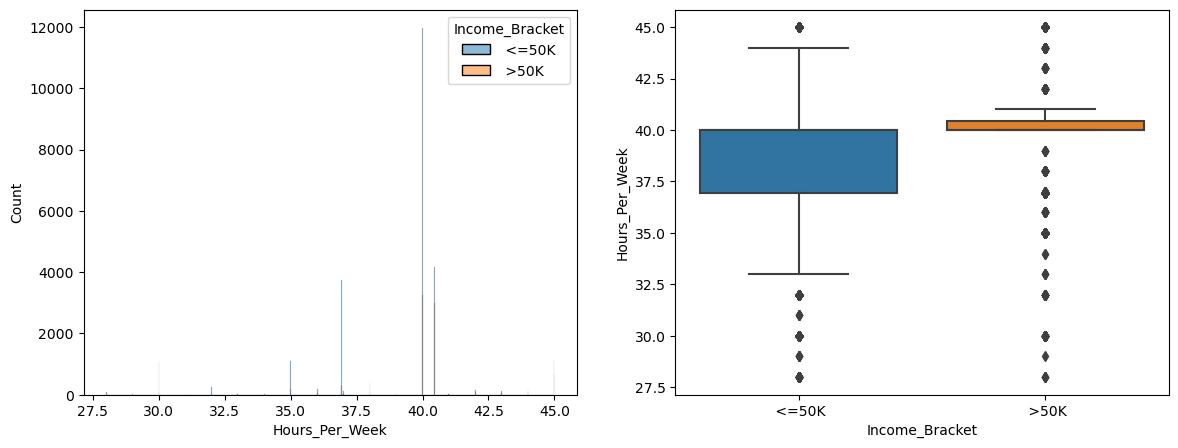

In [20]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =incum_df['Hours_Per_Week'], hue=incum_df['Income_Bracket'],ax=ax[0])
sns.boxplot(y =incum_df['Hours_Per_Week'], x=incum_df['Income_Bracket'],ax=ax[1])

After treating some of the Outliers we still got some outliers which says that people who work between 39-41 hrs per week have most of the income less than 50k and some have income greater than 50k.

Continous Vari 'Education_Num' on Income

<AxesSubplot:xlabel='Income_Bracket', ylabel='Education_Num'>

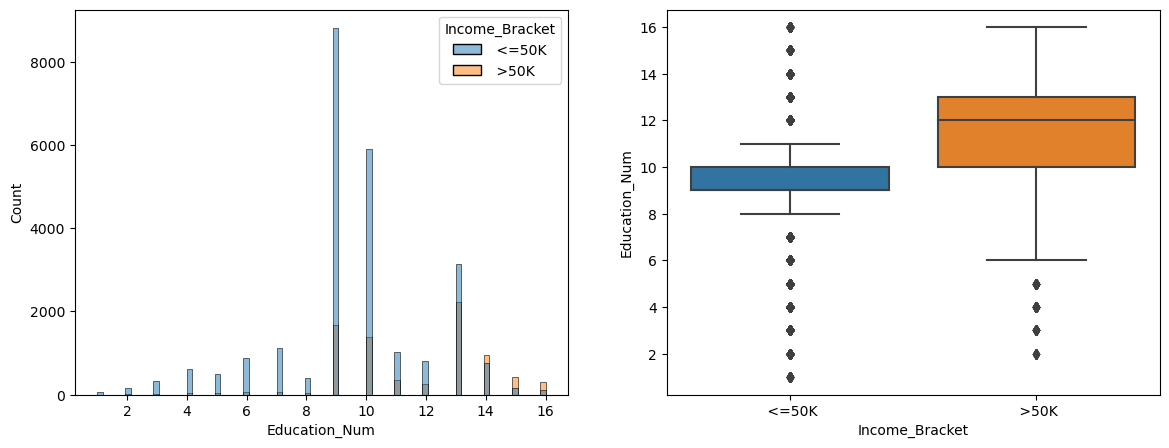

In [21]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =incum_df['Education_Num'], hue=incum_df['Income_Bracket'],ax=ax[0])
sns.boxplot(y =incum_df['Education_Num'], x=incum_df['Income_Bracket'],ax=ax[1])

Outliers Detected 

In [22]:
incum_df.loc[incum_df['Education_Num']>11, 'Education_Num']=incum_df['Education_Num'].mean()
incum_df.loc[incum_df['Education_Num']<8, 'Education_Num']=incum_df['Education_Num'].mean()

<AxesSubplot:xlabel='Income_Bracket', ylabel='Education_Num'>

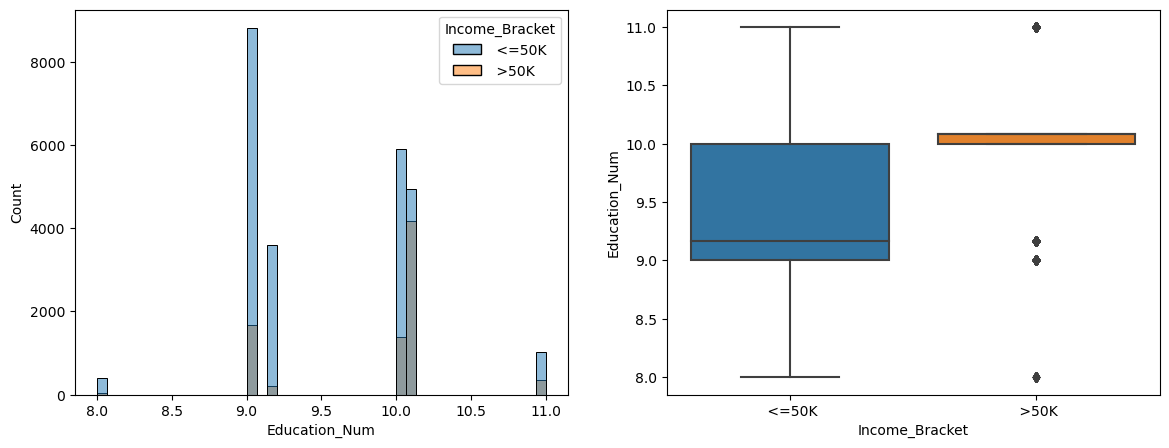

In [23]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =incum_df['Education_Num'], hue=incum_df['Income_Bracket'],ax=ax[0])
sns.boxplot(y =incum_df['Education_Num'], x=incum_df['Income_Bracket'],ax=ax[1])

Their are still some outliers in the data 
After treating them we found that people who have a education no. between 9 to 10 have income less than 50k
and people above the education no. 10 earn more than 50k.

In [24]:
incum_df['Gender'].value_counts()

 Male      21790
 Female    10771
Name: Gender, dtype: int64

In [25]:
incum_df['Income_Bracket'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income_Bracket, dtype: int64

## Analysis on the effect of Gender and Income based on Education

**For Males**

In [26]:
cond1 =incum_df[(incum_df.Gender==' Male') & (incum_df.Income_Bracket == ' >50K')]

In [27]:
d1 = cond1['Education']

In [28]:
d1.value_counts()

 Bachelors       1882
 HS-grad         1449
 Some-college    1190
 Masters          780
 Prof-school      381
 Assoc-voc        294
 Doctorate        256
 Assoc-acdm       209
 10th              59
 11th              52
 7th-8th           39
 12th              29
 9th               22
 5th-6th           14
 1st-4th            6
Name: Education, dtype: int64

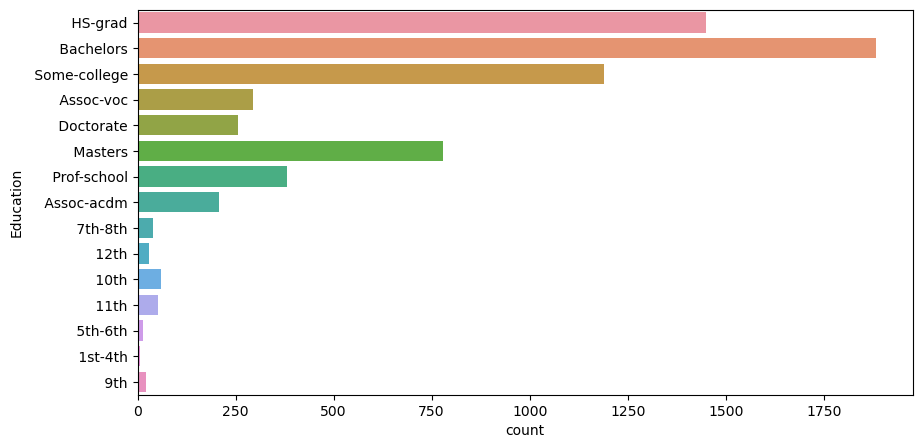

In [87]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Education',data=cond1,orient='h')
plt.show()

From the above the graph we can see that most people who are **Males** and have **income greater than 50k** have **Bachelors** and are **HighSchool graduates**.

In [30]:
cond2 =incum_df[(incum_df.Gender==' Male') & (incum_df.Income_Bracket == ' <=50K')]

In [31]:
d2 = cond2['Education']

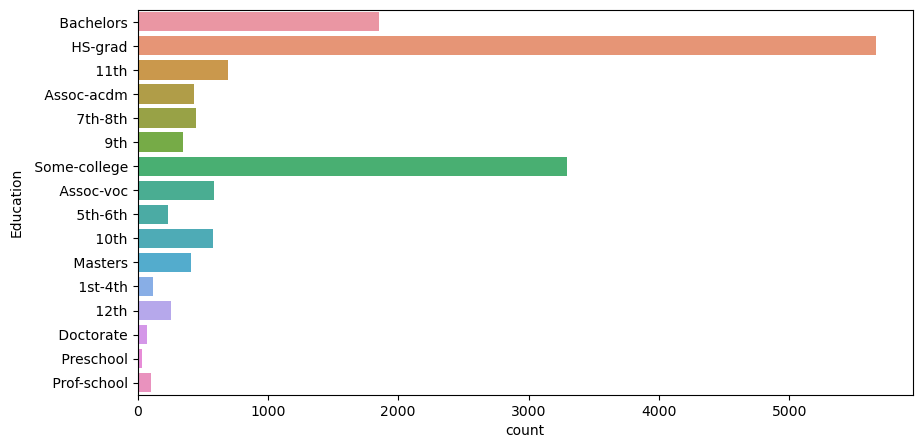

In [32]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Education',data=cond2,orient='h')
plt.show()

From the above the graph we can see that most people who are **Males** and have **income less than 50k** have mostly **HighSchool graduates** and have education from **some college**.

**For Females**

In [33]:
cond3 =incum_df[(incum_df.Gender==' Female') & (incum_df.Income_Bracket == ' <=50K')]

In [34]:
d3 = cond3['Education']

In [35]:
d3.value_counts()

 HS-grad         3164
 Some-college    2609
 Bachelors       1280
 Assoc-voc        433
 11th             424
 Assoc-acdm       365
 Masters          357
 10th             292
 7th-8th          159
 12th             140
 9th              139
 5th-6th           82
 Prof-school       50
 1st-4th           46
 Doctorate         36
 Preschool         16
Name: Education, dtype: int64

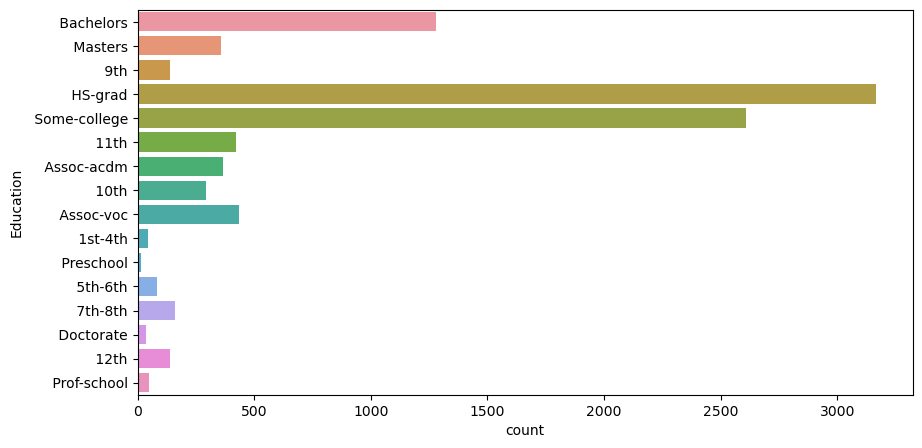

In [36]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Education',data=cond3,orient='h')
plt.show()

From the above the graph we can see that most people who are **Female** and have **income less than or equal 50k** have mostly **HighSchool graduates** and have education from **some college**.

In [37]:
cond4 =incum_df[(incum_df.Gender==' Female') & (incum_df.Income_Bracket == ' >50K')]

In [38]:
d4 = cond4['Education']

In [39]:
d4.value_counts()

 Bachelors       339
 HS-grad         226
 Some-college    197
 Masters         179
 Assoc-voc        67
 Assoc-acdm       56
 Doctorate        50
 Prof-school      42
 11th              8
 9th               5
 12th              4
 10th              3
 5th-6th           2
 7th-8th           1
Name: Education, dtype: int64

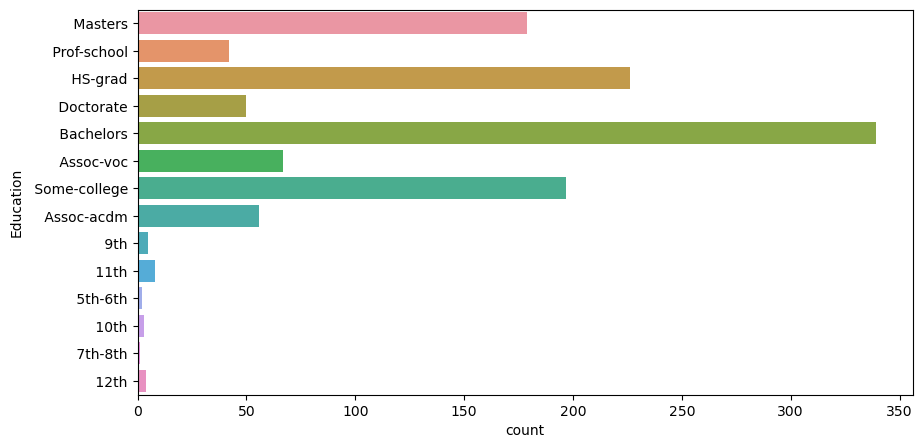

In [40]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Education',data=cond4,orient='h')
plt.show()

From the above the graph we can see that most people who are **Female** and have **income greater than 50k** have mostly **Bachelors** and have education from **HighSchool Graduate**

# Analyzing the effect of Gender and Income based on Marital Status

**For Males**

In [41]:
d5 = cond1['Marital_Status']

In [42]:
d5.value_counts()

 Married-civ-spouse       5938
 Never-married             325
 Divorced                  284
 Separated                  49
 Widowed                    39
 Married-spouse-absent      23
 Married-AF-spouse           4
Name: Marital_Status, dtype: int64

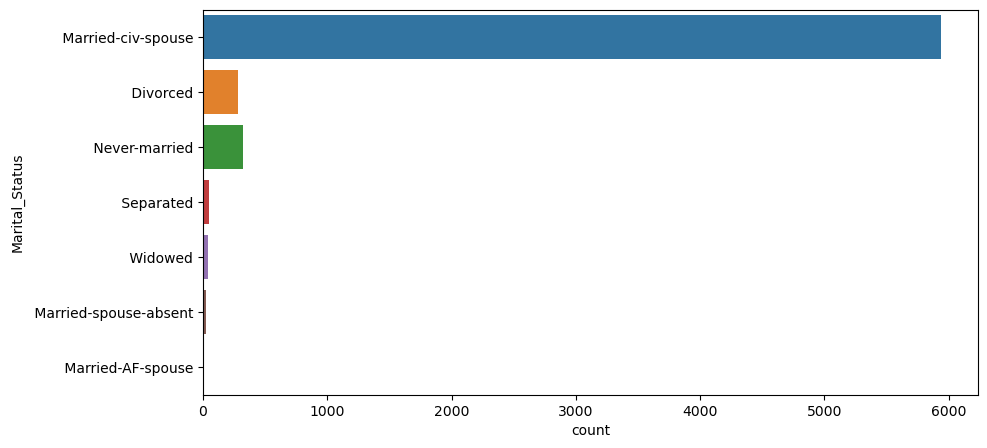

In [43]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Marital_Status',data=cond1,orient='h')
plt.show()

From the above graph we can see that most people who are **Male** and have **income greater than 50K** are **married to civilian** .

In [44]:
d6 = cond2['Marital_Status']

In [45]:
d6.value_counts()

 Married-civ-spouse       7381
 Never-married            5591
 Divorced                 1487
 Separated                 345
 Married-spouse-absent     190
 Widowed                   129
 Married-AF-spouse           5
Name: Marital_Status, dtype: int64

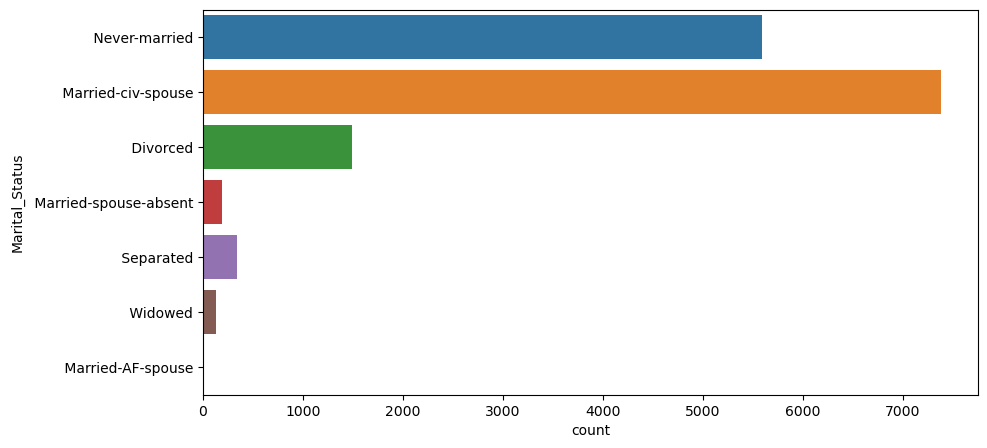

In [46]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Marital_Status',data=cond2,orient='h')
plt.show()

From the above graph we can see that most people who are **Male** and have **income less than 50K** are **married to civilian** and are **single**.

**For female**

In [47]:
d7 =cond4['Marital_Status']

In [48]:
d7.value_counts()

 Married-civ-spouse       754
 Divorced                 179
 Never-married            166
 Widowed                   46
 Separated                 17
 Married-spouse-absent     11
 Married-AF-spouse          6
Name: Marital_Status, dtype: int64

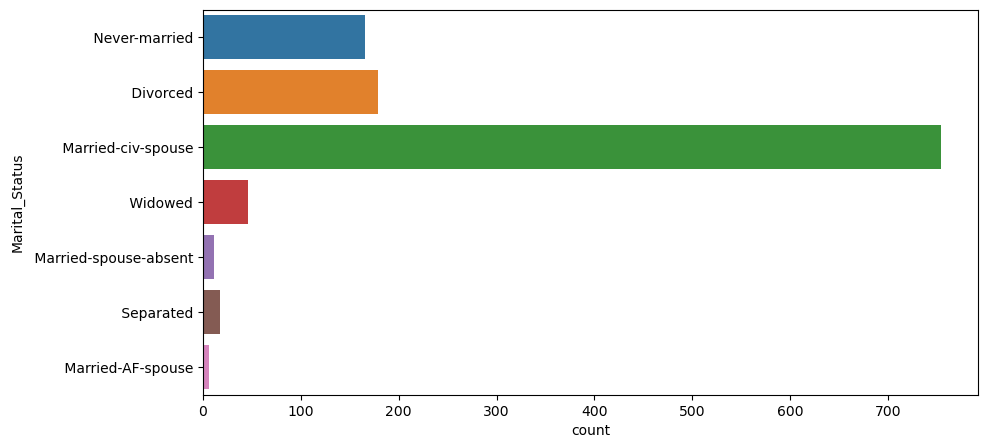

In [49]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Marital_Status',data=cond4,orient='h')
plt.show()

From the above graph we can see that most people who are **Female** and have **income greater than 50K** are **married to civilian** .

## Analyze on Gender and Income based on Age

In [50]:
bins=[0,20,40,50,60,70,80]
labels=['young','adult','senior','super senoir','old','very old']

In [51]:
data1=pd.cut(cond1['Age'],bins=bins,labels=labels)

In [52]:
count_agem=data1.value_counts()

In [53]:
count_agem

adult           2557
senior          2289
super senoir    1358
old              410
very old          47
young              1
Name: Age, dtype: int64

([<matplotlib.patches.Wedge at 0x168b8411bb0>,
 [Text(0.41048563262257165, 1.0742446394608853, 'adult'),
  Text(-1.0335237764598748, -0.37660138540918725, 'senior'),
  Text(0.5258698136645468, -0.9661578230684752, 'super senoir'),
  Text(1.068833206968123, -0.2599914915573922, 'old'),
  Text(1.0997063563551082, -0.025415148871723865, 'very old'),
  Text(1.0999998777671207, -0.0005185675652133803, 'young')],
 [Text(0.2320136184388448, 0.6071817527387612, '38.38%'),
  Text(-0.5637402417053862, -0.2054189374959203, '34.36%'),
  Text(0.28683808018066187, -0.5269951762191682, '20.38%'),
  Text(0.5829999310735215, -0.14181354084948664, '6.15%'),
  Text(0.5998398307391498, -0.013862808475485744, '0.71%'),
  Text(0.5999999333275203, -0.0002828550355709347, '0.02%')])

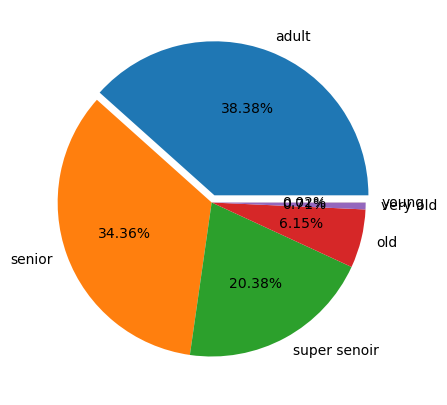

In [54]:
fig, ax =plt.subplots(figsize=(10,5))
plt.pie(x=count_agem, labels=count_agem.index,explode=[0.05,0,0,0,0,0],autopct='%0.2f%%')

From the above pie chart we can see that people who are **Male** and **earn greater than 50k** belong to **Adult Age**.

In [55]:
data2=pd.cut(cond2['Age'],bins=bins,labels=labels)

In [56]:
count_agem1=data2.value_counts()

In [57]:
count_agem1

adult           8665
senior          2640
super senoir    1620
young           1236
old              821
very old         146
Name: Age, dtype: int64

([<matplotlib.patches.Wedge at 0x168b84837f0>,
 [Text(-0.26065309389770447, 1.1200714105098633, 'adult'),
  Text(-0.5892089591079029, -0.9288879386163769, 'senior'),
  Text(0.34538869447744136, -1.0443690199001352, 'super senoir'),
  Text(0.8701328174794978, -0.6729553328009157, 'young'),
  Text(1.0707479845974583, -0.25198959002403476, 'old'),
  Text(1.0994944376901268, -0.033346386437995854, 'very old')],
 [Text(-0.14732566176826772, 0.6330838407229662, '57.28%'),
  Text(-0.321386704967947, -0.5066661483362055, '17.45%'),
  Text(0.1883938333513316, -0.5696558290364373, '10.71%'),
  Text(0.4746179004433624, -0.3670665451641358, '8.17%'),
  Text(0.5840443552349772, -0.1374488672858371, '5.43%'),
  Text(0.5997242387400691, -0.018188938057088645, '0.97%')])

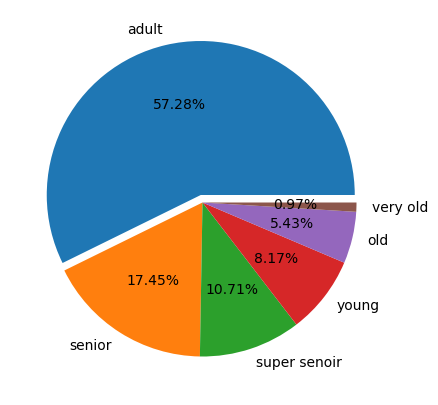

In [58]:
fig, ax =plt.subplots(figsize=(10,5))
plt.pie(x=count_agem1, labels=count_agem1.index,explode=[0.05,0,0,0,0,0],autopct='%0.2f%%')

From the above pie chart we can see that people who are **Male** and **earn less than 50k** belong to **Adult Age**.

**For Female**

In [59]:
data3=pd.cut(cond4['Age'],bins=bins,labels=labels)

In [60]:
count_agef1=data2.value_counts()

In [61]:
count_agef1

adult           8665
senior          2640
super senoir    1620
young           1236
old              821
very old         146
Name: Age, dtype: int64

([<matplotlib.patches.Wedge at 0x168b84ec640>,
 [Text(-0.26065309389770447, 1.1200714105098633, 'adult'),
  Text(-0.5892089591079029, -0.9288879386163769, 'senior'),
  Text(0.34538869447744136, -1.0443690199001352, 'super senoir'),
  Text(0.8701328174794978, -0.6729553328009157, 'young'),
  Text(1.0707479845974583, -0.25198959002403476, 'old'),
  Text(1.0994944376901268, -0.033346386437995854, 'very old')],
 [Text(-0.14732566176826772, 0.6330838407229662, '57.28%'),
  Text(-0.321386704967947, -0.5066661483362055, '17.45%'),
  Text(0.1883938333513316, -0.5696558290364373, '10.71%'),
  Text(0.4746179004433624, -0.3670665451641358, '8.17%'),
  Text(0.5840443552349772, -0.1374488672858371, '5.43%'),
  Text(0.5997242387400691, -0.018188938057088645, '0.97%')])

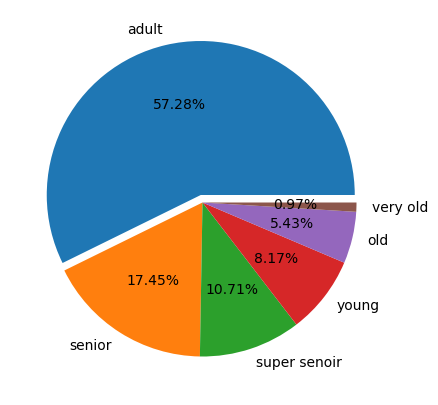

In [62]:
fig, ax =plt.subplots(figsize=(10,5))
plt.pie(x=count_agef1, labels=count_agef1.index,explode=[0.05,0,0,0,0,0],autopct='%0.2f%%')

From the above pie chart we can see that people who are **Female** and **earn greater than 50k** belong to **Adult Age**.

# Analysis on Gender and Income based on Native Country

**For Males**

In [63]:
d8 =cond1['Native_Country']

In [64]:
d8

7         United-States
9         United-States
10        United-States
11                India
14                    ?
              ...      
32532     United-States
32533             Japan
32539     United-States
32554     United-States
32557     United-States
Name: Native_Country, Length: 6662, dtype: object

In [65]:
d8.value_counts()

 United-States      6099
 ?                   129
 Philippines          49
 India                38
 Germany              37
 Mexico               31
 Canada               30
 England              24
 Cuba                 22
 Italy                20
 Japan                19
 Iran                 16
 Taiwan               16
 China                15
 South                13
 Poland               10
 Puerto-Rico          10
 Jamaica               9
 France                9
 El-Salvador           8
 Greece                7
 Cambodia              7
 Hong                  5
 Yugoslavia            5
 Vietnam               4
 Ecuador               4
 Ireland               4
 Haiti                 3
 Guatemala             3
 Peru                  2
 Columbia              2
 Thailand              2
 Portugal              2
 Trinadad&Tobago       2
 Scotland              2
 Hungary               2
 Nicaragua             1
 Laos                  1
Name: Native_Country, dtype: int64

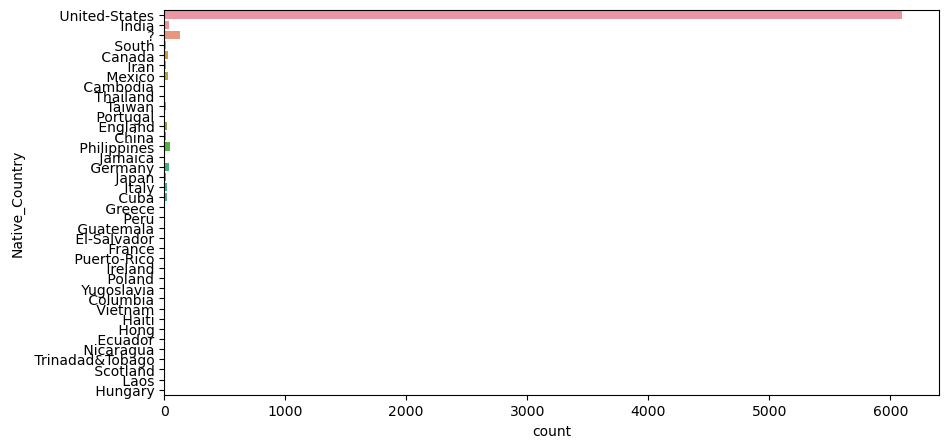

In [66]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Native_Country',data=cond1,orient='h')
plt.show()

From the above graph we can see that most of the people who are **Male** and earn **greater than 50k** are from United States.

**For females**

In [67]:
d9 =cond4['Native_Country']

In [68]:
d9.value_counts()

 United-States         1072
 ?                       17
 Philippines             12
 Canada                   9
 Germany                  7
 England                  6
 China                    5
 Japan                    5
 Italy                    5
 Taiwan                   4
 South                    3
 France                   3
 Cuba                     3
 India                    2
 Poland                   2
 Iran                     2
 Portugal                 2
 Puerto-Rico              2
 Mexico                   2
 Dominican-Republic       2
 Greece                   1
 Nicaragua                1
 Jamaica                  1
 Scotland                 1
 Laos                     1
 Hong                     1
 Ireland                  1
 Hungary                  1
 El-Salvador              1
 Yugoslavia               1
 Honduras                 1
 Thailand                 1
 Vietnam                  1
 Haiti                    1
Name: Native_Country, dtype: int64

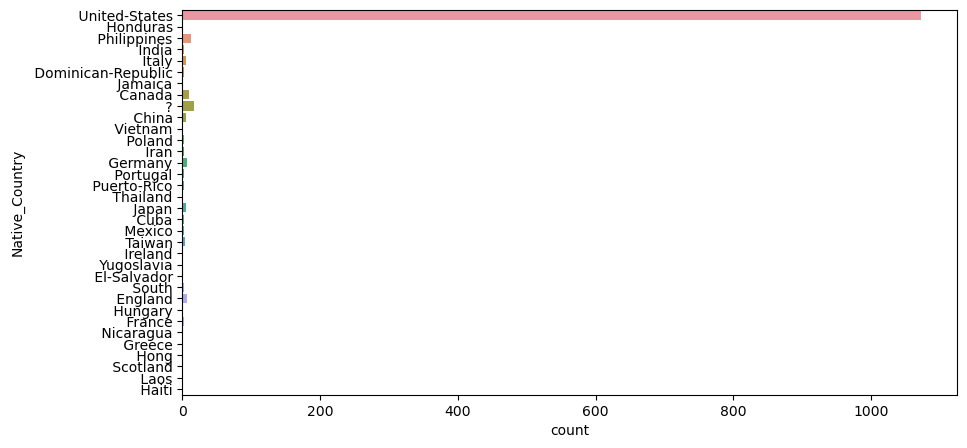

In [69]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Native_Country',data=cond4,orient='h')
plt.show()

From the above graph we can see that most of the people who are **Female** and earn **greater than 50k** are from United States and Philippines.

# Analysis of Gender and Income based on Occupation

**For Males**

In [70]:
d10 = cond1['Occupation']

In [71]:
d10.value_counts()

 Exec-managerial      1688
 Prof-specialty       1474
 Craft-repair          909
 Sales                 895
 Transport-moving      311
 Adm-clerical          295
 Tech-support          238
 Machine-op-inspct     230
 Protective-serv       201
 ?                     139
 Farming-fishing       113
 Other-service          86
 Handlers-cleaners      82
 Armed-Forces            1
Name: Occupation, dtype: int64

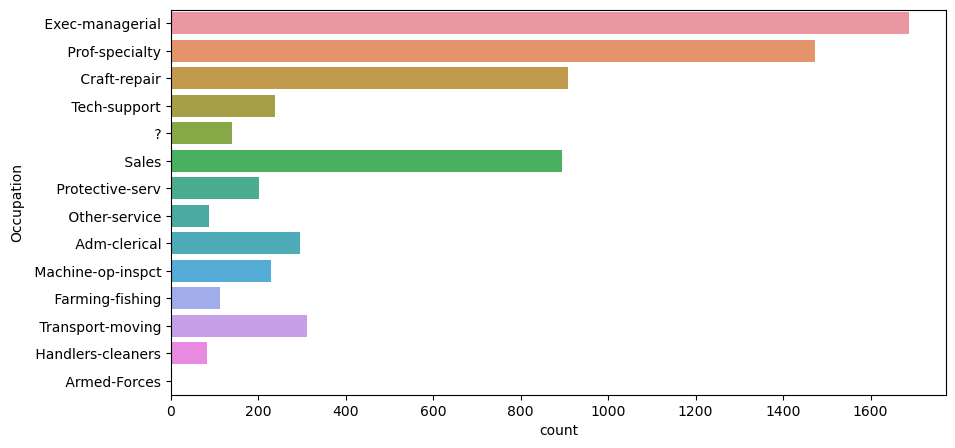

In [89]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Occupation',data=cond1,orient='h')
plt.show()

From the above graph we can see that most of the **Males** who **earn greater than 50K** have occupation as Exec-managerial and   Proffesors. 

In [73]:
d11 = cond2['Occupation']

In [74]:
d11.value_counts()

 Craft-repair         2968
 Sales                1492
 Other-service        1409
 Machine-op-inspct    1222
 Exec-managerial      1219
 Transport-moving     1196
 Prof-specialty       1151
 Handlers-cleaners    1124
 Adm-clerical          938
 ?                     863
 Farming-fishing       816
 Protective-serv       372
 Tech-support          342
 Armed-Forces            8
 Priv-house-serv         8
Name: Occupation, dtype: int64

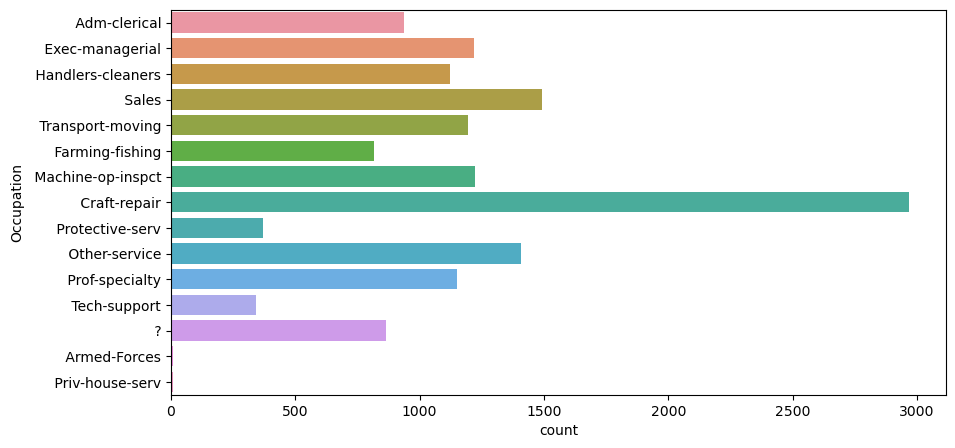

In [75]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Occupation',data=cond2,orient='h')
plt.show()

From the above graph we can see that most of the **Males** who **earn less than or equal to  50K** have occupation as Craft-repair and Sales.

**For Females**

In [76]:
d12 = cond4['Occupation']

In [77]:
d12.value_counts()

 Prof-specialty       385
 Exec-managerial      280
 Adm-clerical         212
 Sales                 88
 ?                     52
 Other-service         51
 Tech-support          45
 Craft-repair          20
 Machine-op-inspct     20
 Protective-serv       10
 Transport-moving       9
 Handlers-cleaners      4
 Farming-fishing        2
 Priv-house-serv        1
Name: Occupation, dtype: int64

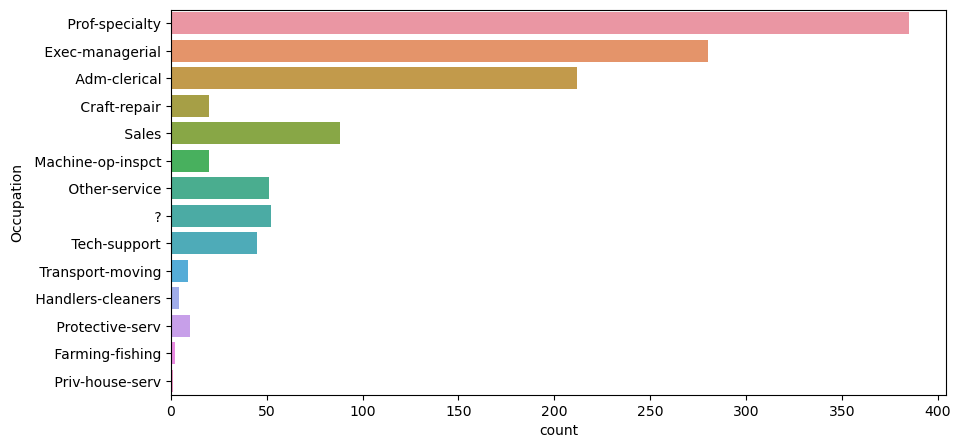

In [78]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Occupation',data=cond4,orient='h')
plt.show()

From the above graph we can see that most of the **Females** who **earn greater than 50K** have occupation are Proffesors and Exec-managerial. 

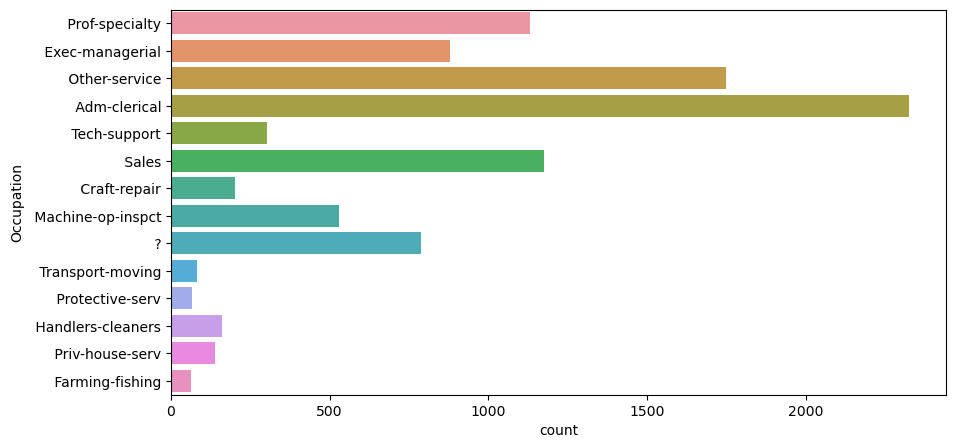

In [79]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Occupation',data=cond3,orient='h')
plt.show()

From the above graph we can see that most of the **Females** who **earn less than or equal to 50K** have occupation are Adm-clerical and Other Services.

# Analysis on Gender and Income based on Hours_Per_Week.

**For Males**

In [80]:
d13 = cond1['Hours_Per_Week']

In [81]:
d13.value_counts()

40.000000    2747
40.437456    2705
45.000000     613
36.947637     138
35.000000     122
44.000000      69
38.000000      64
42.000000      60
30.000000      49
43.000000      33
36.000000      25
32.000000      13
37.000000      11
41.000000       6
39.000000       3
33.000000       1
29.000000       1
34.000000       1
28.000000       1
Name: Hours_Per_Week, dtype: int64

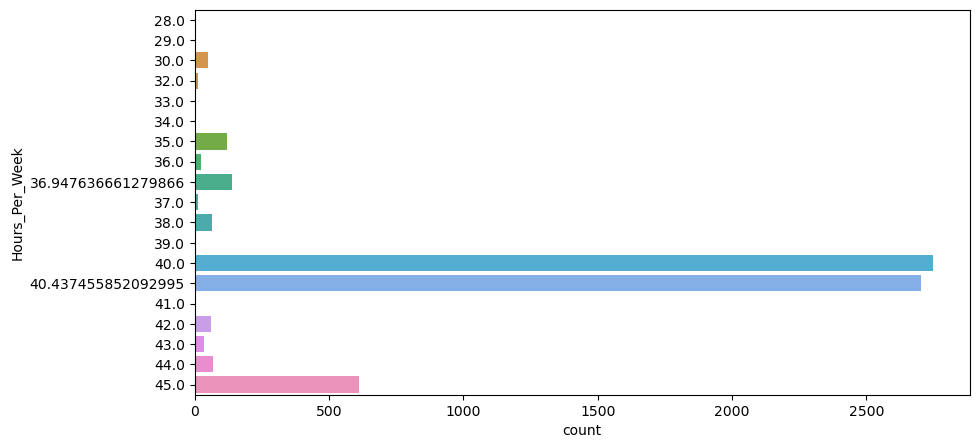

In [82]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Hours_Per_Week',data=cond1,orient='h')
plt.show()

From the graph we can see that most of the **Males** who earn **more than 50k** work **40 hours per week**

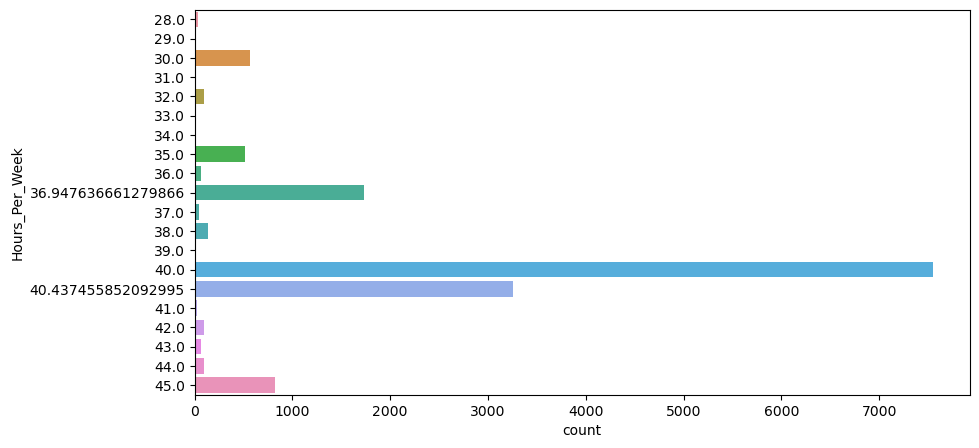

In [83]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Hours_Per_Week',data=cond2,orient='h')
plt.show()

From the graph we can see that most of the **Males** who earn **less than 50k** work **40 hours per week**

**For Females**

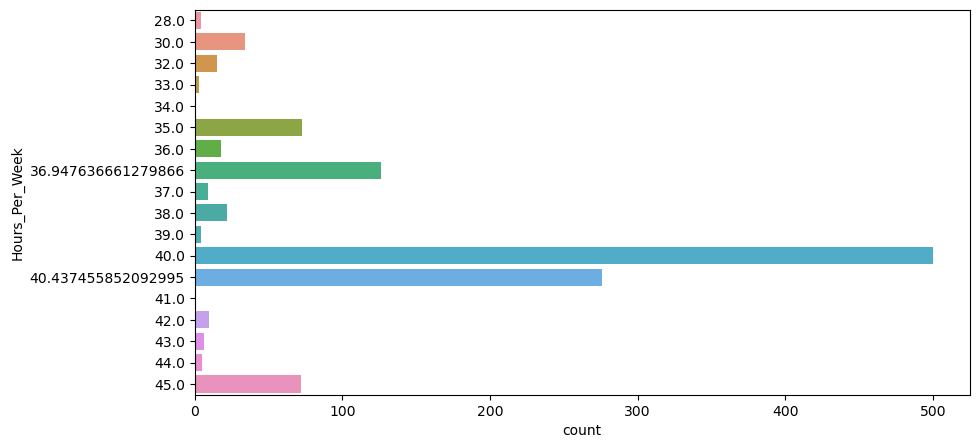

In [84]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Hours_Per_Week',data=cond4,orient='h')
plt.show()

From the graph we can see that most of the **Females** who earn **more than 50k** work **40 hours per week**